Previously, we were able to use LLMs to perform sentiment analysis on Wikipedia articles; however, the results can seem a bit overwhelming in tabular form. In this example, we'll look at how to generate useful visualizations for the results that we obtained previously. First, let's import our plotting utilities.

In [1]:
from sentiment_plots import plot_individual,plot_group,plot_corrs

First we'll look at plot_individual, which displays each row of the .csv file individually. Let's specify the inputs for our plotting function.  We need to say which models we want to see the results for. This can be all or only some of the models you used previously in your analysis. However, it won't work if you specify models that were not used in the analysis, so be careful! Most of the other inputs are the same as what we saw in previous examples, but let's take a look at three new ones. The save_fig parameter specifies whether you want to save the figure that is generated. It's true by default, but you can set it to false if you just want to display it in Jupyter or your IDE. There are two options for the plot_metric parameter: 'paragraph_percent', which shows the percent breakdown of paragraphs by sentiment, and 'article_prob', which shows the aggregated probability of the article belonging to each sentiment. Finally, the labels_col parameter allows you to specify the column name from your .csv file that you want to use for generating the labels.  

In [2]:
models=['bert','roberta','robertuito'] #models you used previously when predicting sentiment. May use all or only some
input_filename='beatles_analysis.csv' #analysis csv file you wish to use for plotting
input_path='path/to/my/file' #Input filepath of csv file. If left unspecified, it is the current working directory
output_filename='beatles_paragraph_analysis_fig.png' #Name of figure to be saved (if save_fig==True). Default = 'figure.png'
output_path='path/to/my/file' #Filepath at which the figure is saved (if save_fig==True). If left unspecified, figure will be saved in working location
save_fig=True #Whether or not to save the figure. True by default
plot_metric='paragraph_percent' #Either 'paragraph_percent' (default) or 'article_prob'
labels_col='Name' #Name of column in the csv file that contains the labels for the plot. Default='Name'

As you can see, we're using the Beatles example from earlier. We're going to generate a plot from the .csv file we generated from the analyze_csv example, and this plot will show a percent breakdown of paragraphs by sentiment. Let's see what it looks like!

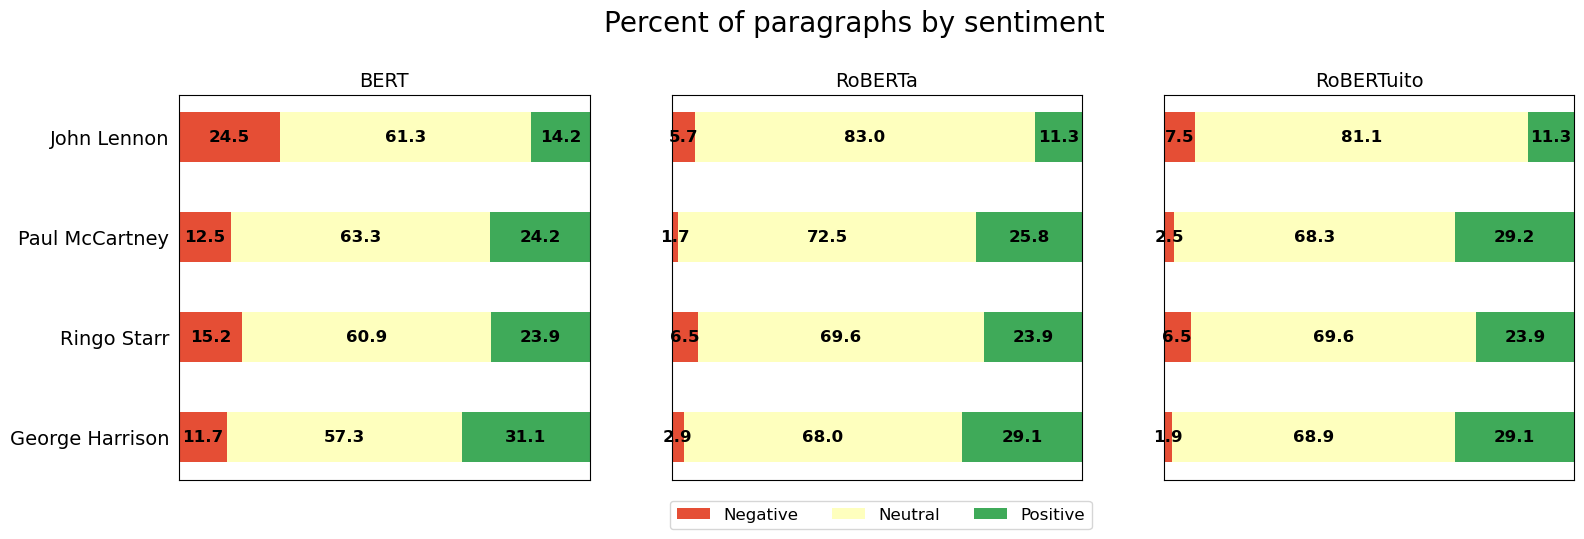

In [3]:
plot_individual(models,input_filename,output_filename=output_filename,save_fig=save_fig,plot_metric=plot_metric)

Nice! As you can see, the Wikipedia articles for the Beatles mostly have neutral or nice things to say. The article with the most negative sentiment belongs to John Lennon: this is a fairly unsurprising result since he was more overtly political compared to the other members which caused some controversy, and he is often blamed for causing the band to break up. Also notice the differences between the models: the standard BERT model is much more sensitive to negative sentiment compared to the other two models. There is also a DistilBERT model that's available in this code that I'm not showing because it's very extreme: it almost never predicts neutral sentiment and I personally find it unsuitable for analyzing Wikipedia articles. However, it's there if you want to use it. Next, let's do an analysis of article probability by sentiment and update the name of the figure that we want to save.

In [4]:
plot_metric='article_prob'
output_filename='beatles_probability_analysis_fig.png'

Let's plot!

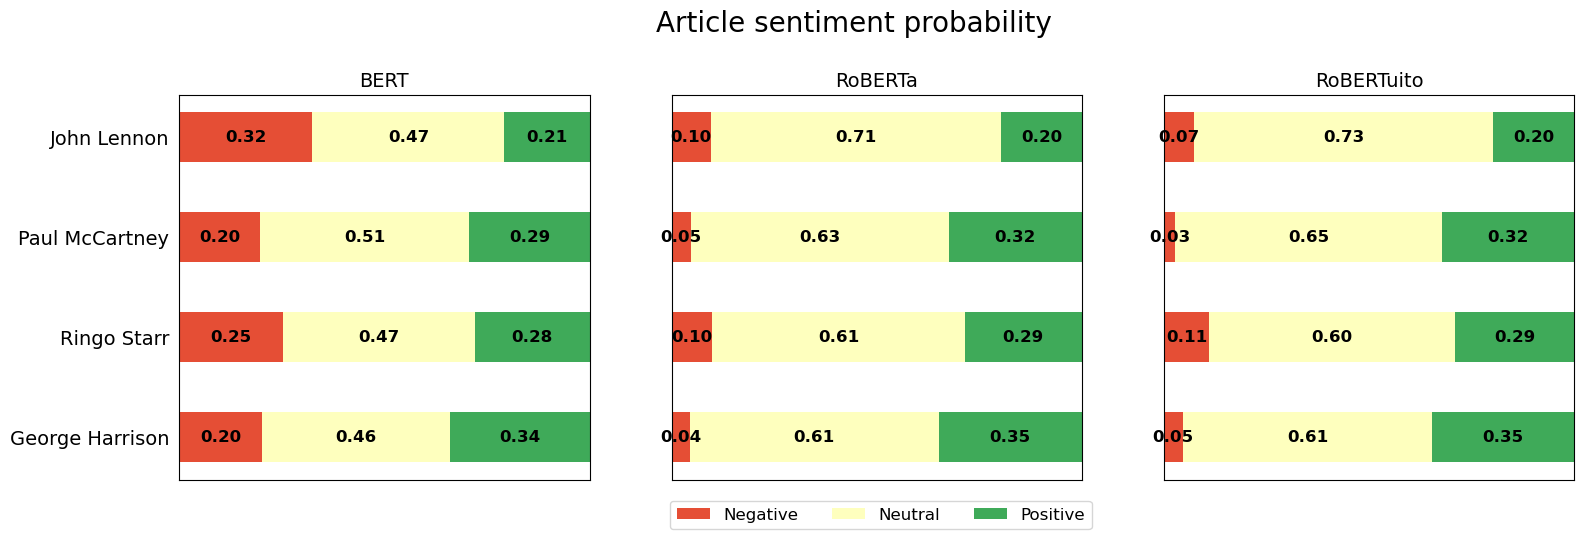

In [5]:
plot_individual(models,input_filename,output_filename=output_filename,save_fig=save_fig,plot_metric=plot_metric)

These results seem pretty consistent with the previous figure. As you can see, plot_individual is useful when you want to look at a set of individual Wikipedia articles. Let's take a look at a new dataset with some famous actors and try using plot_individual again.

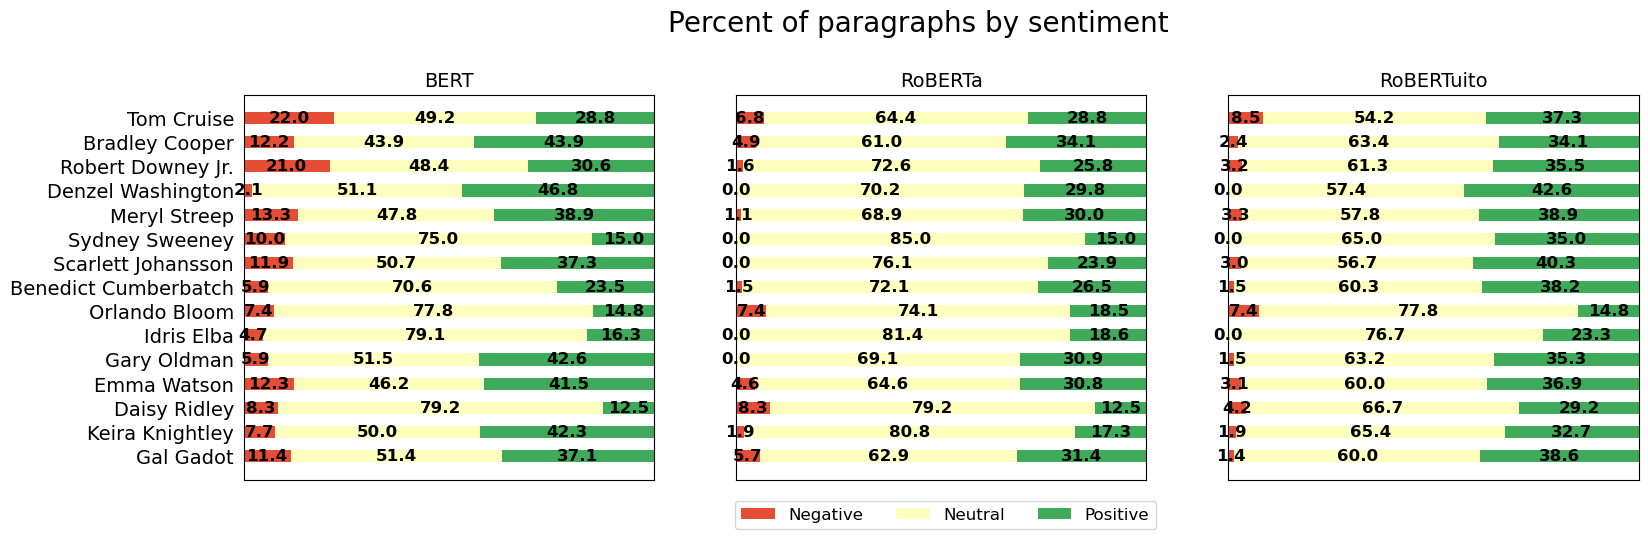

In [6]:
input_filename='actors_analysis.csv' #analysis csv file you wish to use for plotting
plot_individual(models,input_filename,save_fig=False)

It's not as visually pleasing this time, is it? As your dataset gets larger, plots generated by plot_individual will become more cumbersome and it will be difficult to derive any meaningful conclusions from them. In this case, we will want the ability to group entries prior to generating the plot, which will allow us to see the trends in sentiment across different groups of Wikipedia articles. For this purpose, we will use plot_group. It mostly uses the same inputs as plot_individual (models, input_filename, input_path, output_filename, output_path, save_fig, and plot_metric), but there are three new ones: label_cols, label_values, and min_group_size. The label_cols parameter contains a list of the column names by which you want to group the data, the label_values parameter specifies the values that you want to allow in each of those columns, and the min_group_size parameter specifies the minimum number of members a group requires in order to be plotted. It's also important to note that since we're now working with groups rather than individual entries, the aggregrates that we plot will be different. Instead of 'paragraph_percent' and 'article_prob' we have 'avg_paragraph_percent' and 'avg_article_prob', which average the metrics across all articles in the group. Additionally, we add three new aggregates: the percent of articles by most common sentiment ('percent_most_common'), the percent of articles by sentiment with the highest weighted vote ('percent_highest_weighted_vote'), and the percent of articles by sentiment with the highest weighted probability ('percent_highest_weighted_prob'). Now let's look at some grouping examples.

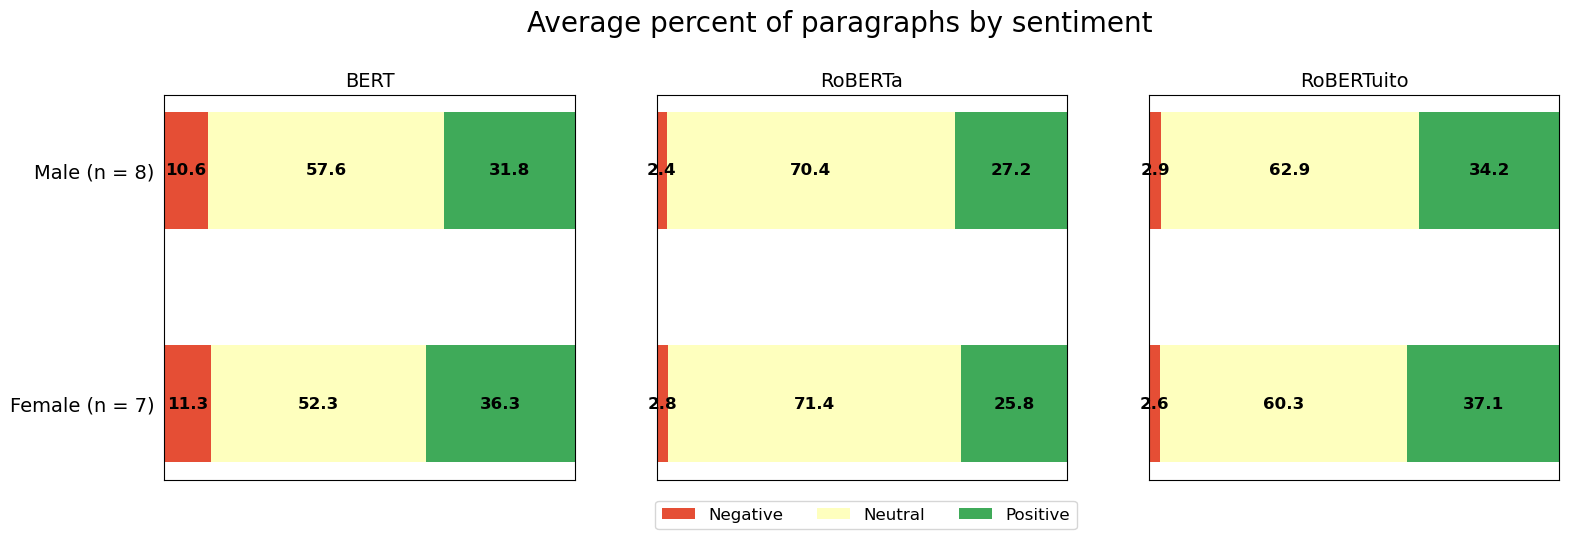

In [7]:
label_cols=['Sex']
plot_metric='avg_paragraph_percent' #'avg_paragraph_percent' (default), 'avg_article_prob', 'percent_most_common', 
#'percent_highest_weighted_vote', or 'percent_highest_weighted_prob'
plot_group(models,input_filename,label_cols,plot_metric=plot_metric,save_fig=False)

Now instead of 15 columns we only have two! Additionally, the plot will tell us how many members are in each group. In this case, we can see that there's not much difference in sentiment for Wikipedia articles for actors vs. actresses, at least the ones in our dataset. Next let's group by nationality.

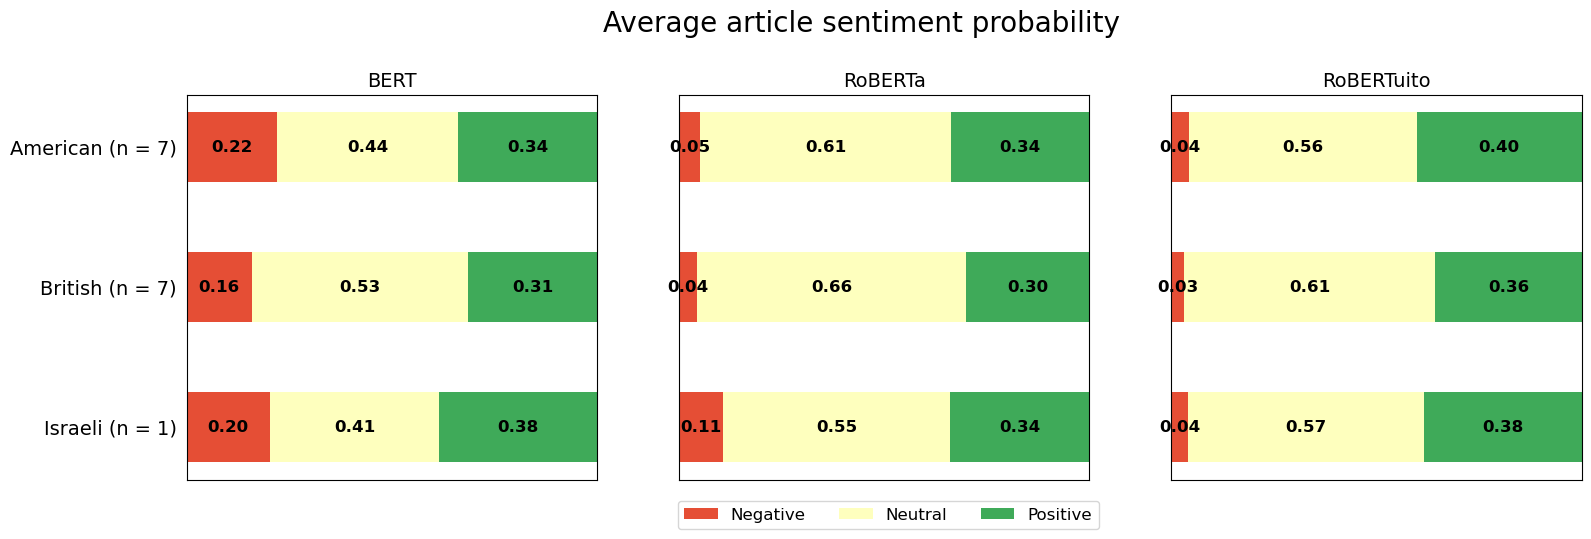

In [8]:
label_cols=['Nationality']
plot_metric='avg_article_prob'
plot_group(models,input_filename,label_cols,plot_metric=plot_metric,save_fig=False)

We can also group by multiple columns simultaneously!

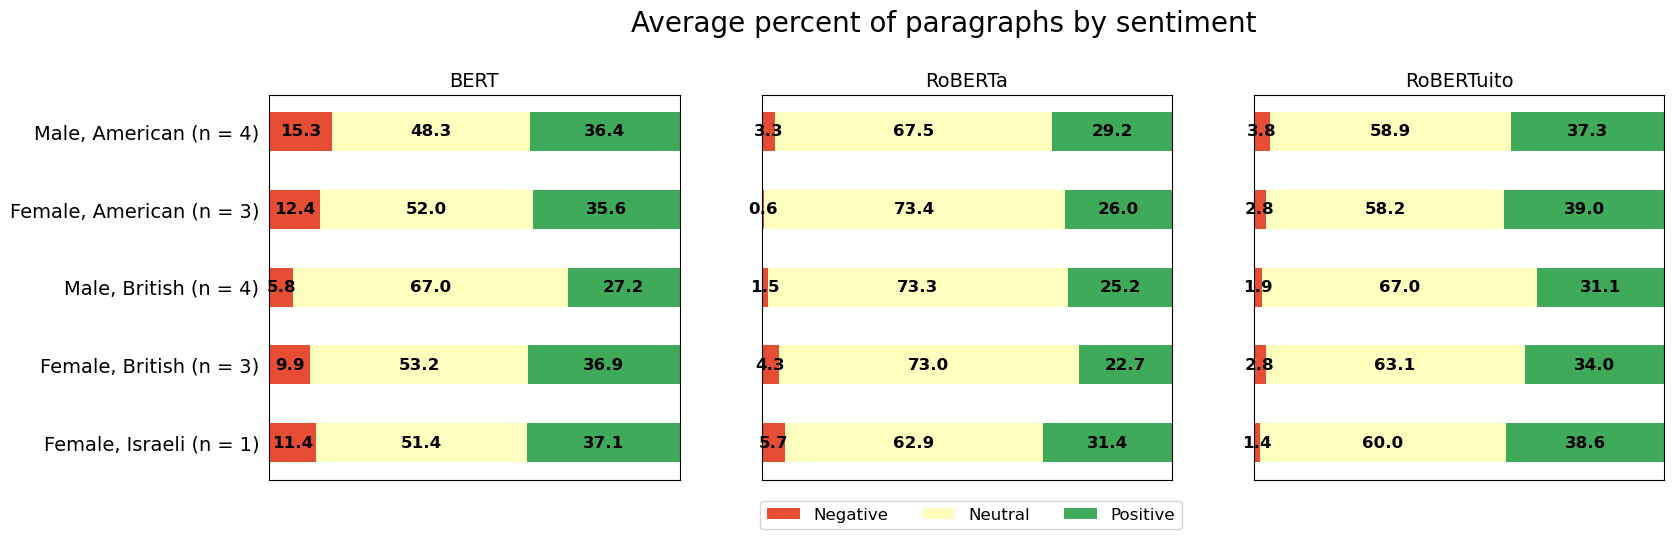

In [9]:
label_cols=['Sex','Nationality']
plot_group(models,input_filename,label_cols,save_fig=False)

Now let's say we want to filter columns based on their values. As an example, let's say we only want to look at American and British actors. In that case, we can filter the Nationality column to only allow American and British, which can be done through the label_values parameter that was mentioned earlier.

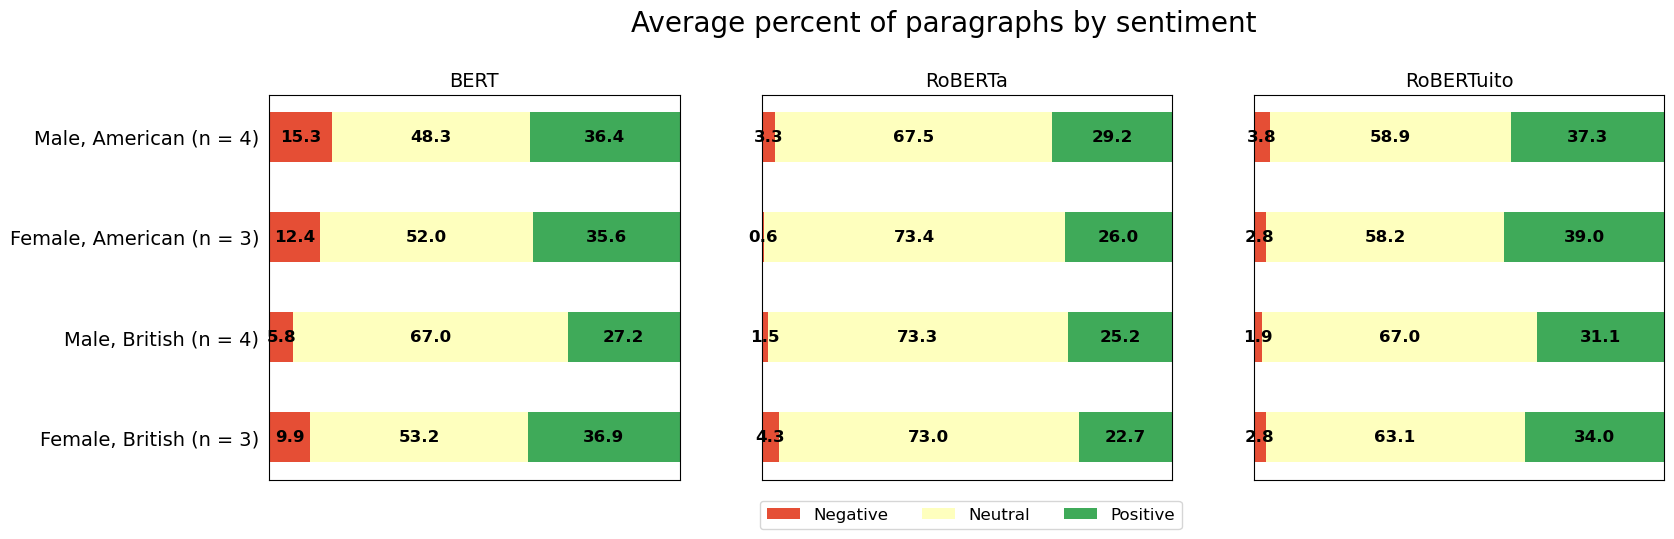

In [10]:
label_cols=['Sex','Nationality']
label_values=[True,['American','British']] #order should correspond to columns in label_cols
plot_group(models,input_filename,label_cols,save_fig=False,label_values=label_values)

Note that label_values must always be the same length as label_cols. A value of True in label_values indicates that all values of the corresponding column will be included. If label_values is not specified, all values for every column in label_cols will be included. As mentioned before, min_group_size can be used to specify the minimum number of members that a group needs in order to be plotted. Let's try it out.

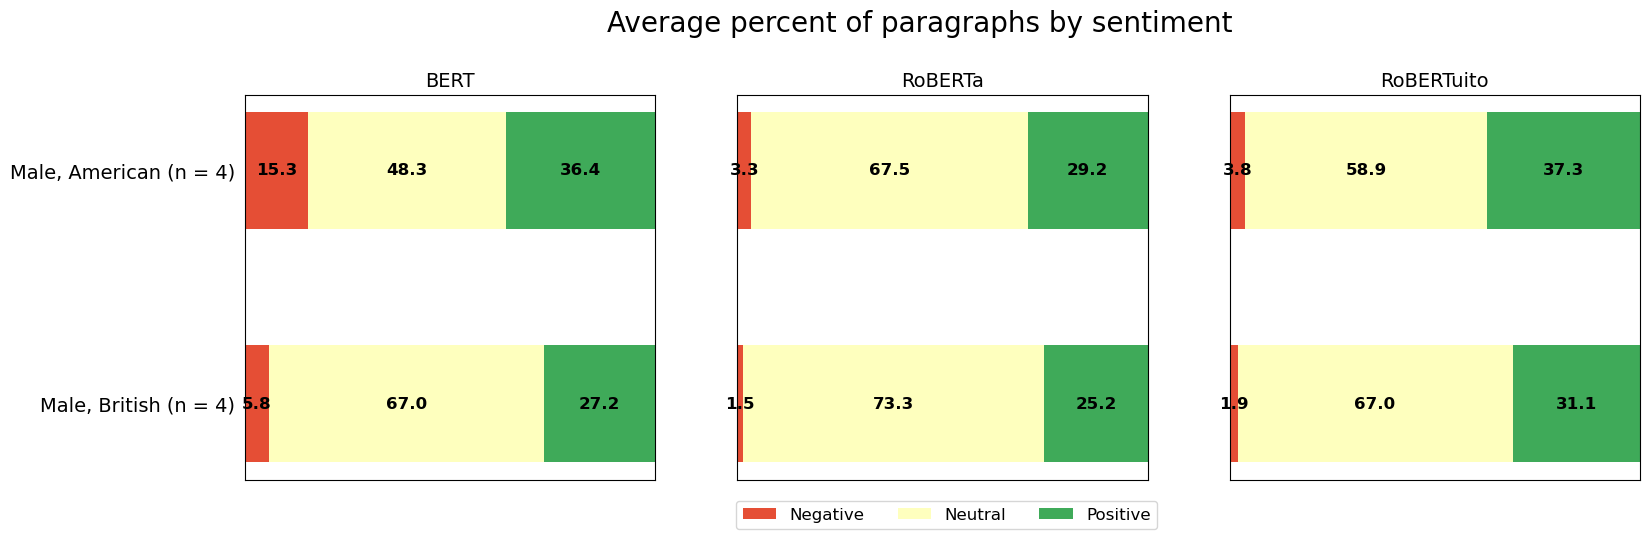

In [11]:
min_group_size=4
plot_group(models,input_filename,label_cols,save_fig=False,min_group_size=min_group_size)

As you can see, the groups with fewer than min_group_size members disappeared, and we didn't need to tinker with label_values to make it happen. Setting min_group_size to a reasonable value is a good way to keep the number of groups from exploding if you're considering lots of possible column value combinations. From all of these examples we can see how plot_group can be useful for observing trends between sentiment and discrete, categorical variables. But what if we want to look for trends between sentiment and continuous variables? For this purpose we will use the plot_corrs function, which creates scatter plots between a continuous variable and either 'paragraph_percent' or 'article_prob', also returning the coefficient of determination (r<sup>2</sup>). As an example, let's see if there's any correlation between an actor's age and the sentiment in their Wikipedia article. First, let's look at the inputs for plot_corrs.

In [12]:
models=['bert','roberta','robertuito'] #models you used previously when predicting sentiment. May use all or only some
input_filename='actors_analysis.csv' #analysis csv file you wish to use for plotting
x_col='Age (years)' #column that contains the continuous variable of interest
input_path='path/to/my/file' #Input filepath of csv file. If left unspecified, it is the current working directory
output_filename='my_figure_name.png' #Name of figure to be saved (if save_fig==True). Default = 'figure.png'
output_path='path/to/my/file' #Filepath at which the figure is saved (if save_fig==True). If left unspecified, figure will be saved in working location
save_fig=True #Whether or not to save the figure. True by default
plot_metric='paragraph_percent' #Either 'paragraph_percent' (default) or 'article_prob'
filter_cols=['col1','col2'] #columns containing categorical variables that are selected for filtering the data prior to plotting
filter_values=[['values1'],['values2']] #values corresponding to filter_cols that are used for filtering

That's a lot of info but let's run an example so things will be a little more clear.

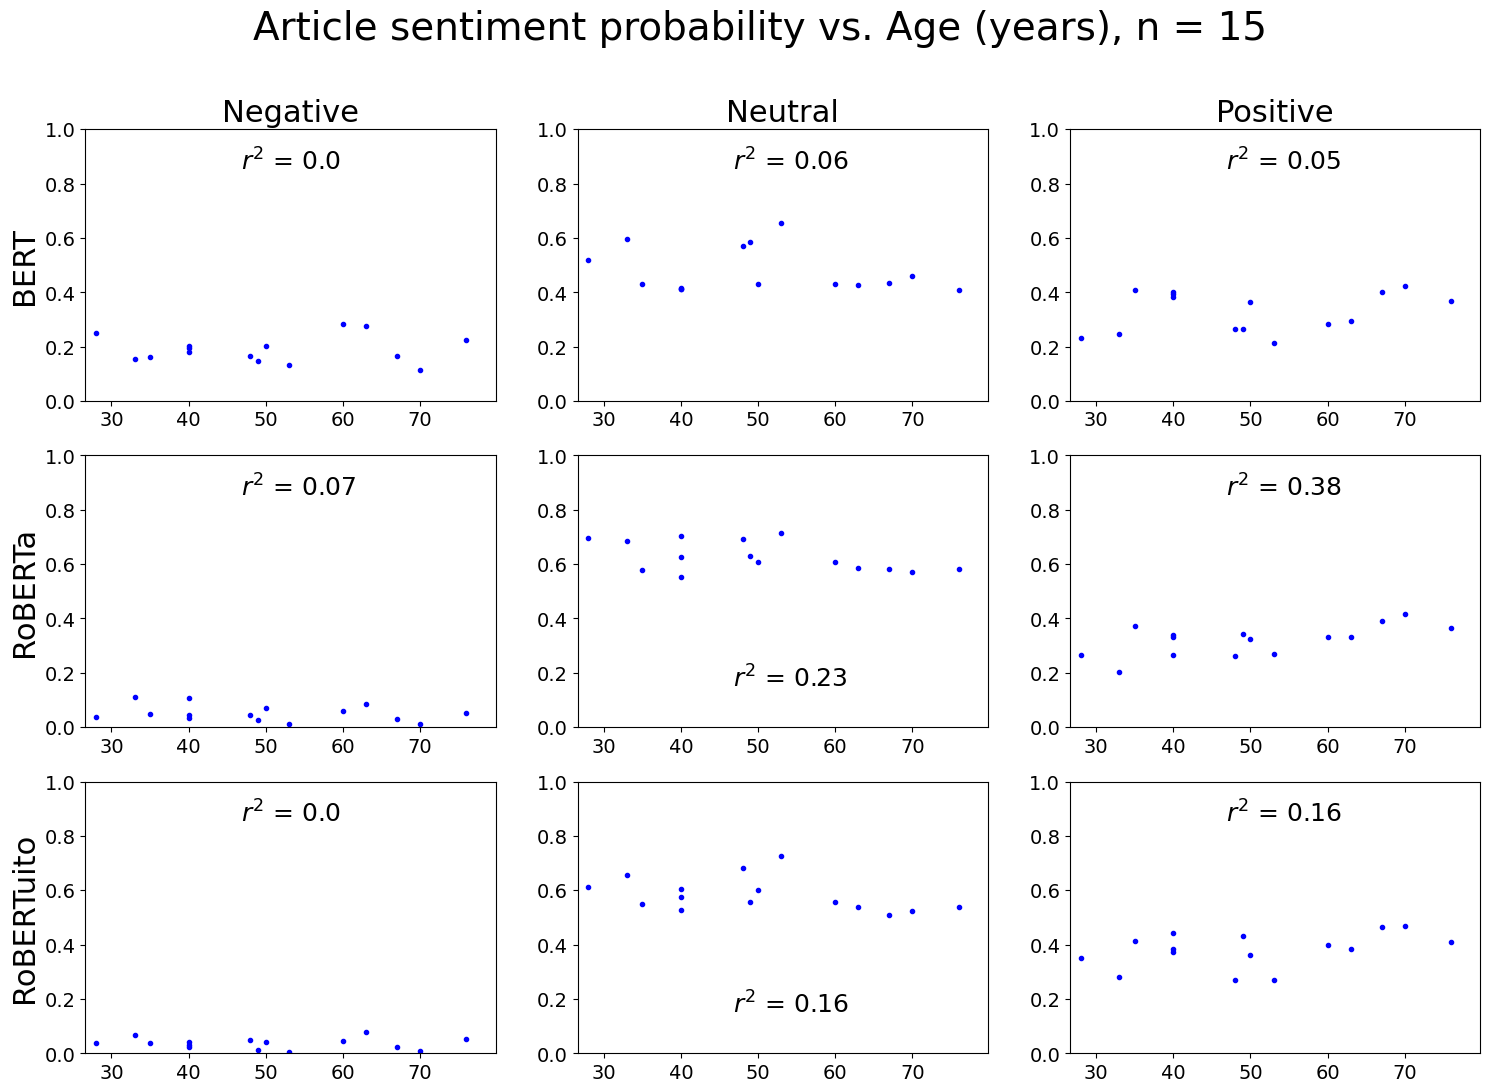

In [13]:
plot_corrs(models,input_filename,x_col,plot_metric='article_prob',save_fig=False)

In this case, it looks like there aren't any significant trends between actor ages and sentiments. Note that you can also specify filter_cols and filter_values in the same way we did previously with label_cols and label_values for plot_group. However, in this case filter_values must be specified and cannot be left as True since we're filtering instead of grouping. Let's take an example and look for trends between article length and sentiment, but only for actresses.

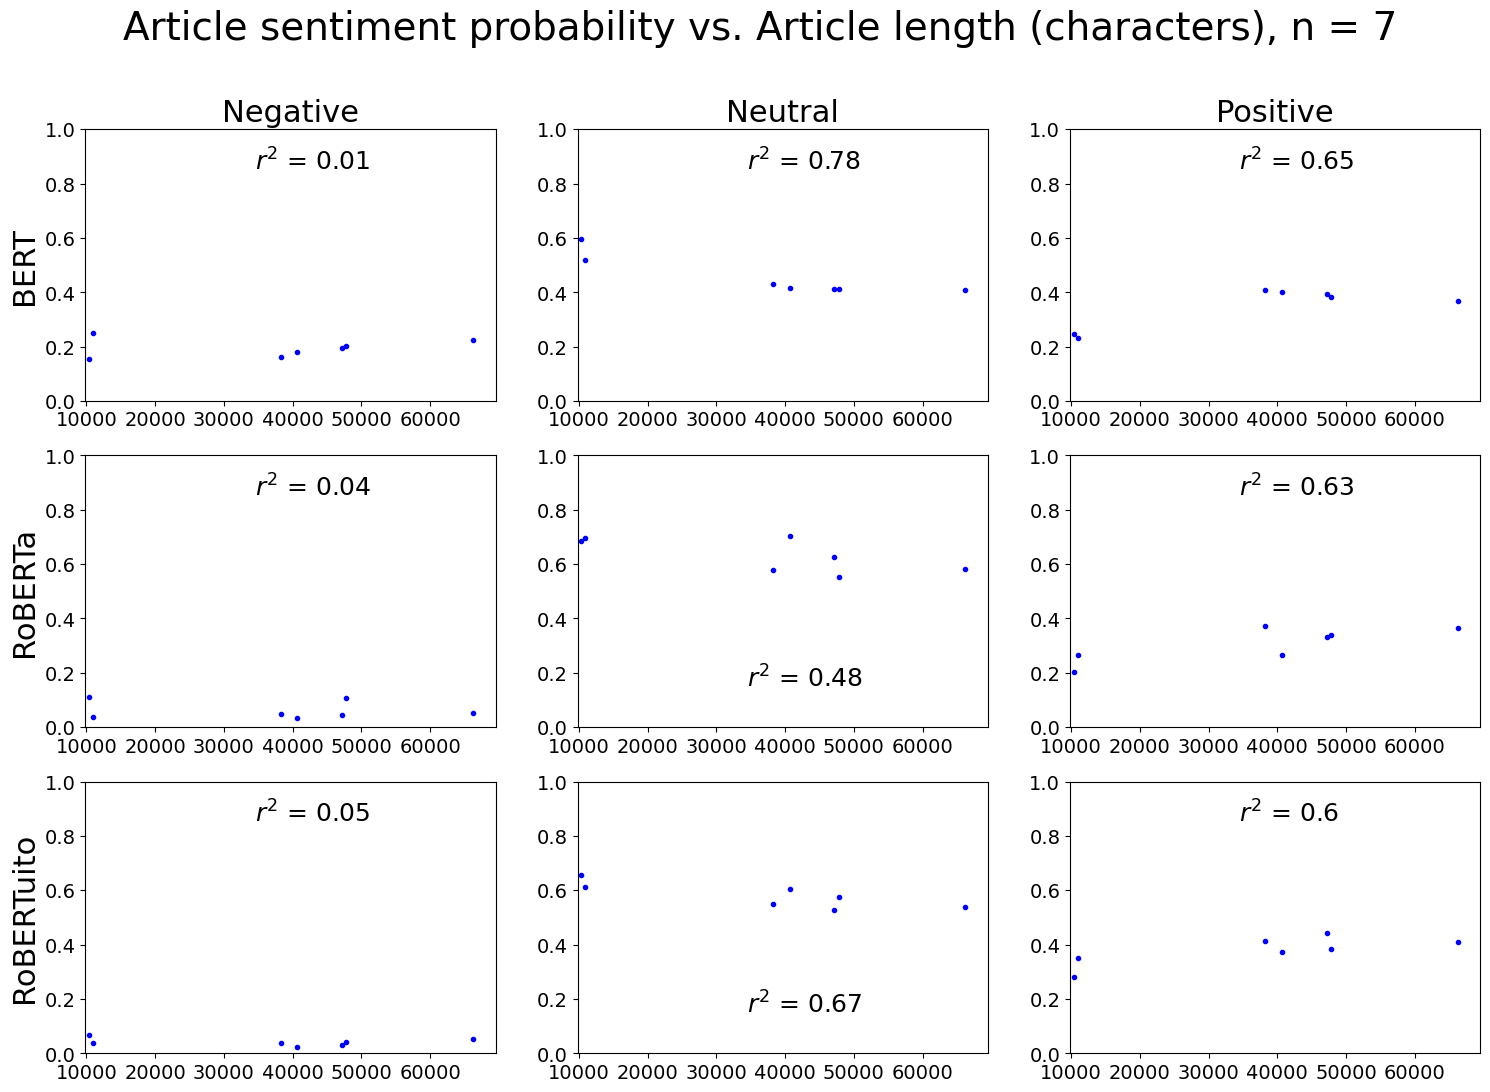

In [14]:
x_col='Article length (characters)'
filter_cols=['Sex']
filter_values=[['Female']]
plot_corrs(models,input_filename,x_col,plot_metric='article_prob',save_fig=False,filter_cols=filter_cols,filter_values=filter_values)

Take the r<sup>2</sup> values with a grain of salt in this case since the sample size is very low. This is merely an example meant to demonstrate the capabilities of plot_corrs, and you can see that it's quite useful when trying to determine how different continuous variables correlate with sentiment.